## Importing libraries

In [1]:
import pandas as pd
import sys
import os
import math
import re # for regular expressions
import string # for dealing with strings
import nltk # for text manipulation
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import validation_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.feature_extraction.text import CountVectorizer
from scipy.stats import randint as sp_randint
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from scipy.stats import uniform 
from textblob import TextBlob
from imblearn.over_sampling import RandomOverSampler

pd.set_option("display.max_colwidth", 200) 

warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

[nltk_data] Downloading package wordnet to /Users/Olivia/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Reading in Data

In [2]:
data = pd.read_csv("Data_Final", index_col = 0)

In [3]:
data.head()

,User_id,Bus_id,Star,Useful,Cool,Funny,Review,State,City,Bus_Ave_Star,User_Review_count,User_Useful_count,User_Funny_count,User_Cool_count,Elite,User_Fans,Users_Ave_Star
0,4hBhtCSgoxkrFgHa4YAD-w,bbEXAEFr4RYHLlZ-HFssTA,5.0,0,0,0,"Great burgers,fries and salad! Burgers have a hint of salt and pepper flavor.\n\nThis location is very quaint. They only have outdoor seating\n\nFriendly staff.\n\nStreet parking as well as parki...",CA,Goleta,4.0,922,1687,694,1070,"2015,2016,2017,2018,2019,20,20,2021",51,4.20
1,JYYYKt6TdVA4ng9lLcXt_g,SZU9c8V2GuREDN5KgyHFJw,5.0,0,0,0,"We were a bit weary about trying the Shellfish Company on the Wharf as more often than not, many places like these (see Cannery Row, Monterey) feast on a captive audience and provide sub-standard ...",CA,Santa Barbara,4.0,338,800,144,353,"2012,2013,2014,2015,2016,2017,2018,2019,20,20,2021",30,4.12
2,Uk3X2AypU8AqvcYEVf7s6Q,eL4lyE7LNoXEMvpcJ8WNVw,3.0,5,0,0,"This was a tough one! On the merits of the wine, fairly average... I understand that the winery has more than one lable and other label is their premium wines. I look forward to when that is av...",CA,Santa Barbara,4.0,431,2126,1245,1476,"2012,2013,2014,2015,2016,2017,2018,2019,20,20,2021",76,4.05
3,LcqNuhqaYt5ekKzaRirmIg,SZU9c8V2GuREDN5KgyHFJw,5.0,2,1,0,"I love trying fresh seafood on piers, wharfs and seaside markets. Most of the time, it is a disappointing experience but this place is not. The food is legitimately fresh and prepared well. The go...",CA,Santa Barbara,4.0,258,452,125,183,"2015,2016,2017",37,3.99
4,gasLVm0KRwrVhPGRcqATjw,CHh0ZFrQcsk4boOItr2Zuw,4.0,1,2,0,"I stopped in because I was hungry for some snacks. Browsed the store since I had some spare time and found it to be clean and well stocked. Wide isles, good selection of bakery stuff, flowers an...",CA,Carpinteria,3.0,1638,2658,933,2297,"2014,2015,2016,2017,2018,2019,20,20,2021",105,3.79


## Dataset Investigation 

In [4]:
data.shape

(53845, 17)

there are 53845 rows (reviews) and 18 variables: user id, business id, star, useful, cool, funny, review, state, city, business average star, user review count, user useful count, user funny count, user cool count, elite, user fans, and user average star.

In [5]:
data.describe()

,Star,Useful,Cool,Funny,Bus_Ave_Star,User_Review_count,User_Useful_count,User_Funny_count,User_Cool_count,User_Fans,Users_Ave_Star
count,53845.000000,53845.000000,53845.000000,53845.000000,53845.000000,53845.000000,53845.000000,53845.000000,53845.000000,53845.000000,53845.000000
mean,4.006166,2.923094,2.167499,1.423085,3.945464,533.424051,2278.217866,1222.665763,1737.274139,73.954165,3.915418
std,1.062143,7.773329,7.263732,4.899106,0.577810,647.733833,6293.197684,4207.956125,5569.163247,168.696255,0.375270
min,1.000000,0.000000,0.000000,0.000000,1.000000,151.000000,14.000000,0.000000,4.000000,0.000000,1.510000
25%,3.000000,0.000000,0.000000,0.000000,3.500000,214.000000,276.000000,78.000000,114.000000,10.000000,3.700000
50%,4.000000,1.000000,0.000000,0.000000,4.000000,341.000000,582.000000,203.000000,283.000000,23.000000,3.930000
75%,5.000000,3.000000,2.000000,1.000000,4.500000,609.000000,1795.000000,704.000000,1076.000000,65.000000,4.160000
max,5.000000,207.000000,184.000000,134.000000,5.000000,17473.000000,206296.000000,185823.000000,199878.000000,3642.000000,5.000000


something to note:
    notice the distribution of the reviews is skewed pretty positively; i.e., the median is 4 stars while the top quarter is all 5 stars. i take this as many people only take the time to write positive reviews. also is just something to note in terms of classifying "good" and "bad", that we have more "good" data than "bad" data, and even 3 stars may not be considered "bad."

Text(0.5, 1.0, 'Histogram of Star Ratings')

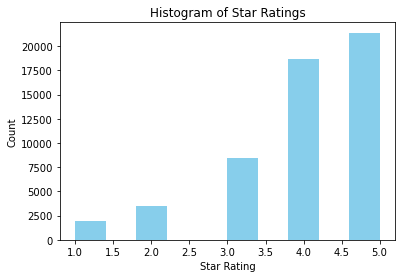

In [6]:
plt.hist(data["Star"], color = "skyblue")
plt.xlabel("Star Rating")
plt.ylabel("Count")
plt.title("Histogram of Star Ratings")

In [7]:
data["Star"].value_counts()

5.0    21388
4.0    18655
3.0     8445
2.0     3460
1.0     1897
Name: Star, dtype: int64

so as we can see it's a pretty skewed distribution.

In [8]:
data.nunique()

User_id              11204
Bus_id                3530
Star                     5
Useful                 134
Cool                   130
Funny                   95
Review               53774
State                    1
City                    25
Bus_Ave_Star             9
User_Review_count     1317
User_Useful_count     2982
User_Funny_count      2115
User_Cool_count       2427
Elite                  552
User_Fans              470
Users_Ave_Star         273
dtype: int64

This data set contains the reviews of 11204 different users, 3530 different businesses in 25 different cities, and 53774 reviews. The necessary data (review and star) is contained in those two columns, so we won't be using any of the other columns throughout this project.

In [9]:
data["City"].value_counts()[:5]

Santa Barbara    42501
Goleta            6009
Carpinteria       2557
Isla Vista        1425
Montecito          848
Name: City, dtype: int64

another thing to note is that most of the reviews are from santa barbara so this will come up a lot in frequency but doesn't necessarily mean positive or negative

## Cleaning and Preprocessing

In [10]:
# !pip3 install imblearn

In [11]:
from imblearn.over_sampling import RandomOverSampler

####  <font color='#9531A9'> Create a new column that is a duplicate of reviews; we use this column to clean and preprocess the data. </font>

In [13]:
data['Cleaned_Review'] = data['Review']

####  <font color='#9531A9'> Cleaning includes removing special characters, multiple spaces, etc. This is all described in the comments </font>

In [14]:
X = data["Cleaned_Review"]
documents = []
stemmer = WordNetLemmatizer()
for i in range(0, len(X)):
    # Remove all the special characters, like parathesis
    document = re.sub(r'\W', ' ', str(X[i]))
    # remove all single characters: like a, b, c, d
    document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)
    # Remove single characters from the start
    document = re.sub(r'\^[a-zA-Z]\s+', ' ', document)
    # Substituting multiple spaces with single space
    document = re.sub(r'\s+', ' ', document, flags=re.I)
    # Removing prefixed 'b'
    document = re.sub(r'^b\s+', '', document)
    # Lemmatization
    document = document.split()
    document = [stemmer.lemmatize(word) for word in document]
    document = ' '.join(document)
    documents.append(document)

In [15]:
cleaned_reviews = pd.DataFrame(documents)

In [16]:
data["Cleaned_Review"] = cleaned_reviews

####  <font color='#9531A9'> Remove stopwords; we remove stopwords because they are very commonly used words in the English language (such as "it", "to", etc) that distract from the important words. </font>

In [17]:
stop = nltk.download('stopwords')
stop = stopwords.words('english') #use english because other languages like spanish would remove el, la, etc..

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/Olivia/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [18]:
# remove words that are in stop words dictionary
data['Cleaned_Review'] = data['Cleaned_Review'].apply(lambda x: ' '.join(x for x in x.split() if x not in stop))
# lambda defines the input (each tweet as it goes through will be input into the function as x)
# here we split the function (tokenize it)
#it searches through and if a word is not a stopword, it will be included

In [19]:
# remove short words (in case these weren't removed with stopwords.)
# because short words that are typose, text or slang abbreviation are words we want to remove from the reviews
data["Cleaned_Review"] = data["Cleaned_Review"].apply(lambda x: ' '.join(x for x in x.split() if len(x) > 2))

In [20]:
# check our cleaned reviews to see what they look like
data.head()

,User_id,Bus_id,Star,Useful,Cool,Funny,Review,State,City,Bus_Ave_Star,User_Review_count,User_Useful_count,User_Funny_count,User_Cool_count,Elite,User_Fans,Users_Ave_Star,Cleaned_Review
0,4hBhtCSgoxkrFgHa4YAD-w,bbEXAEFr4RYHLlZ-HFssTA,5.0,0,0,0,"Great burgers,fries and salad! Burgers have a hint of salt and pepper flavor.\n\nThis location is very quaint. They only have outdoor seating\n\nFriendly staff.\n\nStreet parking as well as parki...",CA,Goleta,4.0,922,1687,694,1070,"2015,2016,2017,2018,2019,20,20,2021",51,4.20,Great burger fry salad Burgers hint salt pepper flavor This location quaint They outdoor seating Friendly staff Street parking well parking lot back
1,JYYYKt6TdVA4ng9lLcXt_g,SZU9c8V2GuREDN5KgyHFJw,5.0,0,0,0,"We were a bit weary about trying the Shellfish Company on the Wharf as more often than not, many places like these (see Cannery Row, Monterey) feast on a captive audience and provide sub-standard ...",CA,Santa Barbara,4.0,338,800,144,353,"2012,2013,2014,2015,2016,2017,2018,2019,20,20,2021",30,4.12,bit weary trying Shellfish Company Wharf often many place like see Cannery Row Monterey feast captive audience provide sub standard fare high price However emboldened perennial good review Yelp su...
2,Uk3X2AypU8AqvcYEVf7s6Q,eL4lyE7LNoXEMvpcJ8WNVw,3.0,5,0,0,"This was a tough one! On the merits of the wine, fairly average... I understand that the winery has more than one lable and other label is their premium wines. I look forward to when that is av...",CA,Santa Barbara,4.0,431,2126,1245,1476,"2012,2013,2014,2015,2016,2017,2018,2019,20,20,2021",76,4.05,This tough one merit wine fairly average understand winery one lable label premium wine look forward available went two week ago maybe already Location like pier wonderful outdoor patio nicer sett...
3,LcqNuhqaYt5ekKzaRirmIg,SZU9c8V2GuREDN5KgyHFJw,5.0,2,1,0,"I love trying fresh seafood on piers, wharfs and seaside markets. Most of the time, it is a disappointing experience but this place is not. The food is legitimately fresh and prepared well. The go...",CA,Santa Barbara,4.0,258,452,125,183,"2015,2016,2017",37,3.99,love trying fresh seafood pier wharf seaside market Most time disappointing experience place The food legitimately fresh prepared well The gorgeous view cherry top nature beautiful sundae ordered ...
4,gasLVm0KRwrVhPGRcqATjw,CHh0ZFrQcsk4boOItr2Zuw,4.0,1,2,0,"I stopped in because I was hungry for some snacks. Browsed the store since I had some spare time and found it to be clean and well stocked. Wide isles, good selection of bakery stuff, flowers an...",CA,Carpinteria,3.0,1638,2658,933,2297,"2014,2015,2016,2017,2018,2019,20,20,2021",105,3.79,stopped hungry snack Browsed store since spare time found clean well stocked Wide isle good selection bakery stuff flower usual grocery like locally made snack like California Kettle Corn Taco Wor...


####  <font color='#9531A9'> now we investigate the most commonly used words for the total dataset, good ratings, and bad ratings. </font>

In [21]:
#this shows our ten most used words for the entire dataset
freq = pd.Series(' '.join(data['Cleaned_Review']).split()).value_counts()[:10]
freq

The       67675
place     34441
good      32948
food      25631
like      22866
great     21383
time      21046
one       20662
get       19559
really    17206
dtype: int64

In [22]:
# check infrequently used words for funsies
freq = pd.Series(' '.join(data['Cleaned_Review']).split()).value_counts()[-10:]
freq
#this shows us the last ten words (least frequent)

janani        1
Drooling      1
Guksu         1
drowsed       1
unenviable    1
tht           1
kathryn       1
desecrate     1
43c           1
embossing     1
dtype: int64

####  <font color='#9531A9'> Now we normalize the words (aka make everything lowercase) but we have to tokenize them first. </font>

In [23]:
# tokenize the words
tokenized_review = data['Cleaned_Review'].apply(lambda x: x.split()) # tokenizing 

In [24]:
# nltk.download('wordnet')  
lemmatizer = WordNetLemmatizer() 
tokenized_review = tokenized_review.apply(lambda x: [lemmatizer.lemmatize(i) for i in x]) # stemming

In [25]:
for i in range(len(tokenized_review)):
    tokenized_review[i] = ' '.join(tokenized_review[i])
    
data['Cleaned_Review'] = tokenized_review

In [26]:
data['Cleaned_Review'] = tokenized_review

In [27]:
data.head()

,User_id,Bus_id,Star,Useful,Cool,Funny,Review,State,City,Bus_Ave_Star,User_Review_count,User_Useful_count,User_Funny_count,User_Cool_count,Elite,User_Fans,Users_Ave_Star,Cleaned_Review
0,4hBhtCSgoxkrFgHa4YAD-w,bbEXAEFr4RYHLlZ-HFssTA,5.0,0,0,0,"Great burgers,fries and salad! Burgers have a hint of salt and pepper flavor.\n\nThis location is very quaint. They only have outdoor seating\n\nFriendly staff.\n\nStreet parking as well as parki...",CA,Goleta,4.0,922,1687,694,1070,"2015,2016,2017,2018,2019,20,20,2021",51,4.20,Great burger fry salad Burgers hint salt pepper flavor This location quaint They outdoor seating Friendly staff Street parking well parking lot back
1,JYYYKt6TdVA4ng9lLcXt_g,SZU9c8V2GuREDN5KgyHFJw,5.0,0,0,0,"We were a bit weary about trying the Shellfish Company on the Wharf as more often than not, many places like these (see Cannery Row, Monterey) feast on a captive audience and provide sub-standard ...",CA,Santa Barbara,4.0,338,800,144,353,"2012,2013,2014,2015,2016,2017,2018,2019,20,20,2021",30,4.12,bit weary trying Shellfish Company Wharf often many place like see Cannery Row Monterey feast captive audience provide sub standard fare high price However emboldened perennial good review Yelp su...
2,Uk3X2AypU8AqvcYEVf7s6Q,eL4lyE7LNoXEMvpcJ8WNVw,3.0,5,0,0,"This was a tough one! On the merits of the wine, fairly average... I understand that the winery has more than one lable and other label is their premium wines. I look forward to when that is av...",CA,Santa Barbara,4.0,431,2126,1245,1476,"2012,2013,2014,2015,2016,2017,2018,2019,20,20,2021",76,4.05,This tough one merit wine fairly average understand winery one lable label premium wine look forward available went two week ago maybe already Location like pier wonderful outdoor patio nicer sett...
3,LcqNuhqaYt5ekKzaRirmIg,SZU9c8V2GuREDN5KgyHFJw,5.0,2,1,0,"I love trying fresh seafood on piers, wharfs and seaside markets. Most of the time, it is a disappointing experience but this place is not. The food is legitimately fresh and prepared well. The go...",CA,Santa Barbara,4.0,258,452,125,183,"2015,2016,2017",37,3.99,love trying fresh seafood pier wharf seaside market Most time disappointing experience place The food legitimately fresh prepared well The gorgeous view cherry top nature beautiful sundae ordered ...
4,gasLVm0KRwrVhPGRcqATjw,CHh0ZFrQcsk4boOItr2Zuw,4.0,1,2,0,"I stopped in because I was hungry for some snacks. Browsed the store since I had some spare time and found it to be clean and well stocked. Wide isles, good selection of bakery stuff, flowers an...",CA,Carpinteria,3.0,1638,2658,933,2297,"2014,2015,2016,2017,2018,2019,20,20,2021",105,3.79,stopped hungry snack Browsed store since spare time found clean well stocked Wide isle good selection bakery stuff flower usual grocery like locally made snack like California Kettle Corn Taco Wor...


####  <font color='#9531A9'> Add a "label" column which basically just assigns a 1 if the review is 4 or 5 stars and 0 otherwise so we can classify "good" vs "bad" reviews easily. </font>

In [28]:
# create labels
data["label"] = data["Star"] >= 4

In [29]:
data["label"] = data["label"].astype(int)

In [30]:
# eliminate irrelevant columns
data.drop(data.columns.difference(['label','Cleaned_Review', 'Star']), 1, inplace=True)

####  <font color='#9531A9'> here i just created some visualizations to get a better representation of the words that are associated with certain ratings. 
    Understanding the common words used: WordCloud__

Now lets  see how well the given sentiments are distributed across the dataset. One way to accomplish this task is by understanding the common words by plotting wordclouds.

A wordcloud is a visualization wherein the most frequent words appear in large size and the less frequent words appear in smaller sizes.

Let’s visualize all the words our data using the wordcloud plot.</font>

In [31]:
# !pip3 install wordcloud

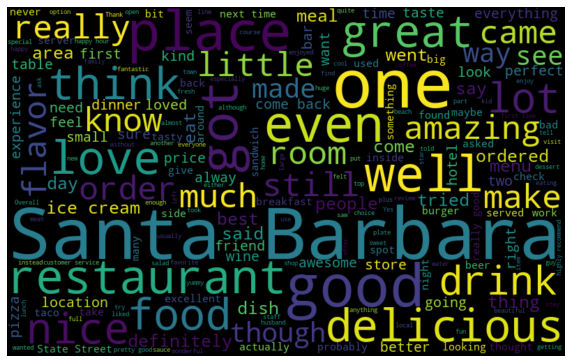

In [32]:
# plot for all words
all_words = ' '.join([text for text in data['Cleaned_Review']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

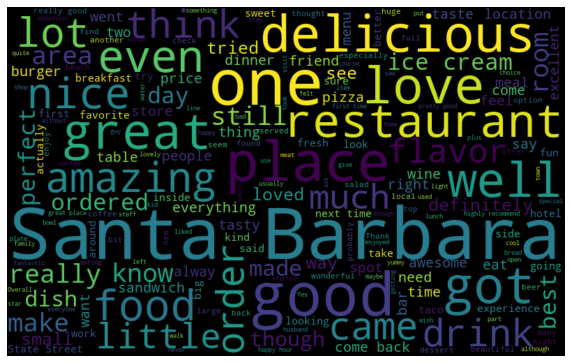

In [33]:
# words in good reviews
normal_words =' '.join([text for text in data['Cleaned_Review'][data['Star'] >= 4]])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

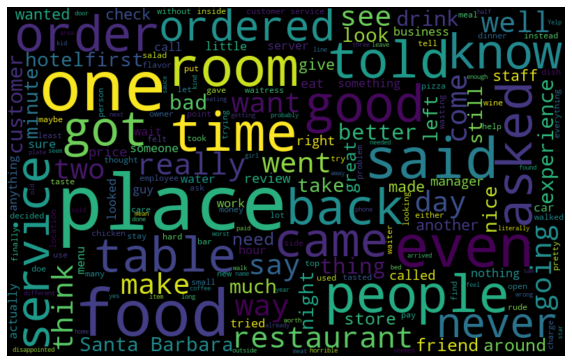

In [34]:
# words in bad reviews
normal_words =' '.join([text for text in data['Cleaned_Review'][data['Star'] <= 1]])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

####  <font color='#9531A9'> Obtain average sentiment score and plot high frequency words for further analysis. 
The average sentiment score for the reviews is generated using sentiment analysis from TextBlob.
Here, we only extract polarity as it indicates the sentiment as value nearer to 1 means a positive sentiment, and values nearer to -1 means a negative sentiment. </font>

In [35]:
cleaned_pos_reviews = data[data.Star >= 4]

sentiment_review_positive = cleaned_pos_reviews['Cleaned_Review'].apply(lambda x: TextBlob(x).sentiment[0]).mean()
sentiment_review_positive

0.3052489625896597

In [36]:
cleaned_neg_reviews = data[data.Star == 1]
sentiment_review_negative = cleaned_neg_reviews['Cleaned_Review'].apply(lambda x: TextBlob(x).sentiment[0]).mean()
sentiment_review_negative

-0.004506162595295506

so, clearly the sentiment score for "good" reviews is much closer to 1 than for "bad" reviews.

In [37]:
negative_review_words = ' '.join([i for i in cleaned_neg_reviews["Cleaned_Review"]]).split()

In [38]:
positive_review_words = ' '.join([i for i in cleaned_pos_reviews["Cleaned_Review"]]).split()

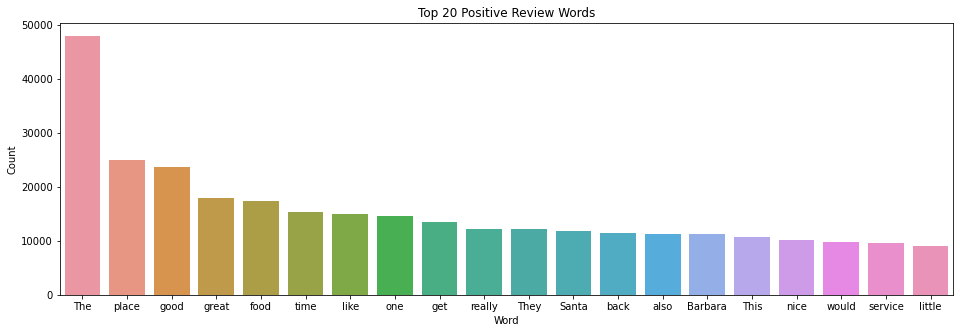

In [39]:
a = nltk.FreqDist(positive_review_words)
d = pd.DataFrame({'Word': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 20 most frequent words
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Word", y = "Count")
ax.set(ylabel = 'Count')
plt.title("Top 20 Positive Review Words")
plt.show()

Notice how the top 20 words include positive diction, such as "good," "great," "delicious," and "love." They also include other words that indicate positive sentiment, such as "family," and "come" and "back."

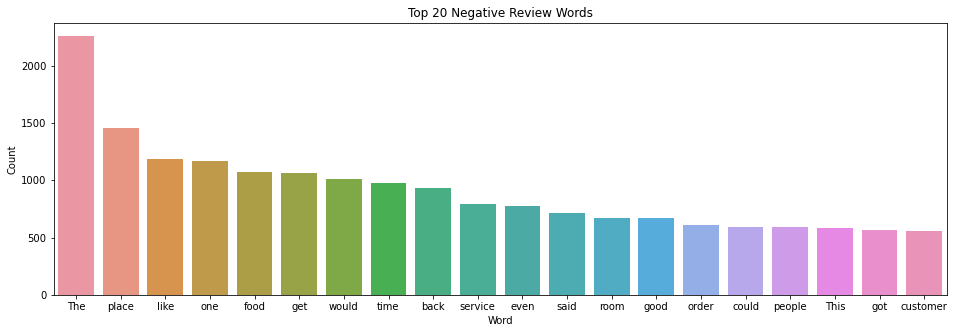

In [40]:
a = nltk.FreqDist(negative_review_words)
d = pd.DataFrame({'Word': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 20 most frequent words
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Word", y = "Count")
ax.set(ylabel = 'Count')
plt.title("Top 20 Negative Review Words")
plt.show()

Out of the top 20 most frequently used words in negative reviews, only one of them would be considered a "positive" word while the rest are neutral or negative. Words like "never" and "time" could indicate a negative experience.

## Extract Features from Cleaned Data

####  <font color='#9531A9'> We are going to use bag of words for our feature extraction and then a random forest algorithm to build a model. </font>

In [41]:
# put data into train test split
train, test = train_test_split(data, test_size = 0.30, random_state=42)

Use Count Vectorizer

<div>
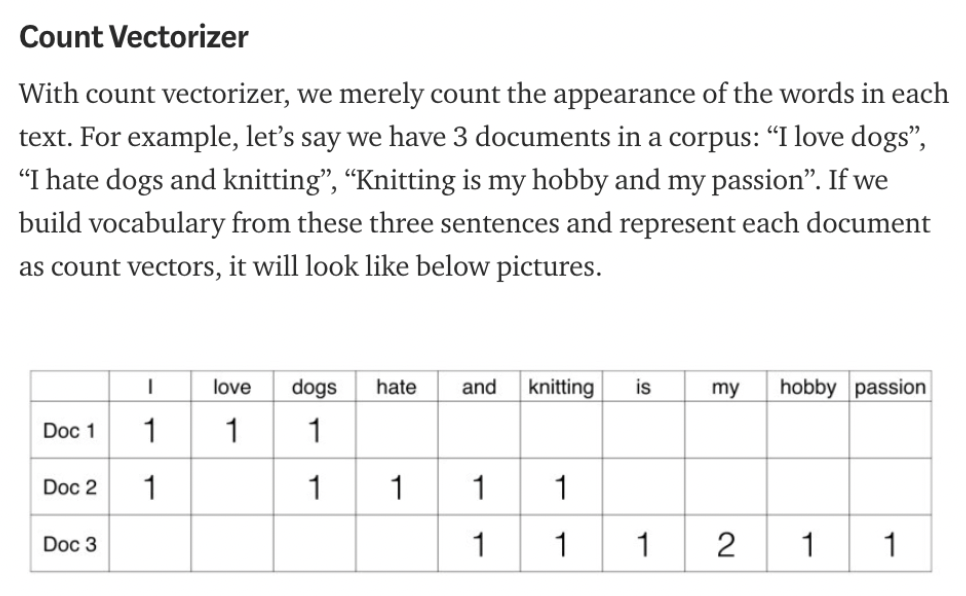
</div>

In [42]:
# bag of words features
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, stop_words='english') #max_features=1000,
bow = bow_vectorizer.fit_transform(train["Cleaned_Review"])
bow.shape

(37691, 24814)

## Building and Evaluating Models: Random Forest and Logistic Regression

####  <font color='#9531A9'> Random Forest:
First, we are going to split up our testing and training sets, then use randomized search to choose optimal hyperparameters for our model. </font>
I'm using a 70/30 split for the training and validation sets.
I chose random forest because its efficiency is notable in large datasets and this one is pretty big (took forever for randomized search to run) so I'd prefer this over other algorithms. Unlike other models, it doesn't tend to overfit with a lot of features, which again we have a lot of here, so it's a particularly good choice. 

In [43]:
train_bow = bow[:37691,:]
test_bow = bow[37691:,:]
# splitting data into training and validation set
X_train, X_test, y_train, y_test = train_test_split(train_bow, train['label'],  
                                                          random_state=42, 
                                                          test_size=0.3)

In [44]:
#this runs cross validation on whichever estimator/model family we specify
def evaluate_model(estimator, X, y):  #define the function evaluate_model with input arguments of (estimator, X, y)
    cv_results = cross_validate(estimator, X, y,  
                     scoring="roc_auc",
                          n_jobs=-1, cv=3,
                     return_train_score=True)
    return pd.DataFrame(cv_results).mean().to_dict()

RESULTS = {} #make an empty results dictionary

Here I'm going to use randomized search to pick the hyperparameters that give the best result of the model.

In [45]:
#Special tool for picking hyper-parameters
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from scipy.stats import uniform 

In [46]:
from sklearn.ensemble import RandomForestClassifier

In [47]:
rf = RandomForestClassifier()

In [48]:
# investigate all the params for random forest that we can choose from
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [49]:
param_rf = {
    "n_estimators": [100, 300, 500, 800],
    "max_depth": [5, 15, 25],
    "min_samples_split": [2, 5, 10, 15],
    "min_samples_leaf":[1, 2, 5, 10],
}

In [50]:
# This sets up an object that will find the best hyper-parameters for us
# Idea is similar to a normal classifier - instantiate, fit, use model

#This is 'instantiating it'
rf_random = RandomizedSearchCV(
    estimator=rf, 
    param_distributions=param_rf,
   scoring="roc_auc", n_jobs=-1)

In [51]:
%%time
# this is fitting it
rf_random.fit(X_train, y_train)

CPU times: user 22.7 s, sys: 2.69 s, total: 25.4 s
Wall time: 21min 46s


RandomizedSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 15, 25],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15],
                                        'n_estimators': [100, 300, 500, 800]},
                   scoring='roc_auc')

In [52]:
# This gets our best model roc_auc
rf_random.best_score_

0.864758722270994

In [53]:
# This returns our best parameters
rf_random.best_params_

{'n_estimators': 300,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_depth': 25}

In [54]:
# This is our first best estimator
rf_random.best_estimator_

RandomForestClassifier(max_depth=25, min_samples_split=5, n_estimators=300)

####  <font color='#9531A9'> Now I'm going to run the final random forest model with the best estimator and evaluate the fit of the model by looking at the test score, train score, and accuracy.  </font>

In [55]:
rf_predictions = rf_random.best_estimator_.predict(X_test)

In [56]:
# look at confusion matrix
cmtx = pd.DataFrame(
    confusion_matrix(y_test, rf_predictions, labels=[0, 1]), 
    index=['true: yes', 'true: no'], 
    columns=['pred: yes', 'pred: no']
)
print(cmtx)

           pred: yes  pred: no
true: yes        117      2810
true: no           2      8379


In [57]:
# get accuracy
accuracy_score(y_test, rf_predictions)

0.7513264945171559

In [58]:
# get precision
precision_score(y_test, rf_predictions)

0.7488604879792653

In [59]:
# get recall
recall_score(y_test, rf_predictions)

0.9997613649922443

Overall the model seems to perform pretty well given that the data was imbalanced, including far more 4 and 5 star ratings than 1, 2, and 3 star ratings, plus the "bad" ratings were somewhat ambiguous since they included moderate 3 star ratings. The accuracy came in at 0.751 while the precision was 0.748, and the recall was 0.999 which is really good since it means the model is able to classify positive results effectively; however, this may be a result of the imbalanced classes, so we will evaluate again after balancing them. 

In [62]:
print(classification_report(y_test, rf_predictions))

              precision    recall  f1-score   support

           0       0.98      0.04      0.08      2927
           1       0.75      1.00      0.86      8381

    accuracy                           0.75     11308
   macro avg       0.87      0.52      0.47     11308
weighted avg       0.81      0.75      0.65     11308



the minority class has a recall of 0.03, which means only 3% of the class is captured by the model. We'll proceed by balancing the dataset and then training the model again so that more of the class is captured.

####  <font color='#9531A9'> Balance the dataset and retrain the model.  </font>

In [63]:
ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros= ros.fit_resample(X_train, y_train)

In [64]:
# Train the random forest model
ros_model = rf_random.best_estimator_.fit(X_train_ros, y_train_ros)
ros_prediction = ros_model.predict(X_test)
# Check the model performance
print(classification_report(y_test, ros_prediction))

              precision    recall  f1-score   support

           0       0.67      0.69      0.68      2927
           1       0.89      0.88      0.89      8381

    accuracy                           0.83     11308
   macro avg       0.78      0.79      0.78     11308
weighted avg       0.83      0.83      0.83     11308



minority class recall has improved so it is being represented fairly in the dataset.

####  <font color='#9531A9'> Evaluate model on new balanced dataset  </font>

In [65]:
RESULTS["rf_balanced_model"] = evaluate_model(
    ros_model,
    X_test, y_test
)

In [66]:
# create df summarizing test and train score
results_df = pd.DataFrame.from_dict(RESULTS).T
results_df

,fit_time,score_time,test_score,train_score
rf_balanced_model,8.463679,0.230522,0.860074,0.975075


In [67]:
rf_balanced_predictions = ros_model.predict(X_test)

In [68]:
# look at confusion matrix
cmtx = pd.DataFrame(
    confusion_matrix(y_test, rf_balanced_predictions, labels=[0, 1]), 
    index=['true: yes', 'true: no'], 
    columns=['pred: yes', 'pred: no']
)
print(cmtx)

           pred: yes  pred: no
true: yes       2012       915
true: no         974      7407


In [69]:
# get accuracy
accuracy_score(y_test, rf_balanced_predictions)

0.832950123806155

In [70]:
# get precision
precision_score(y_test, rf_balanced_predictions)

0.8900504686373468

In [71]:
# get recall
recall_score(y_test, rf_balanced_predictions)

0.8837847512230044

the new model performed better on the balanced dataset. precision and accuracy increased.

####  <font color='#9531A9'> Logistic Regression  </font>

In [74]:
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression() #instantiate logistic regression

In [75]:
# specifiy search parameters for our logistic regression (not comprehensive to save time)
from scipy.stats import randint as sp_randint
from scipy.stats import uniform 

param_dist_random = {
    #"penalty": "l2", #["l1", "l2"],
    "C": uniform(loc=0.1, scale=2),
    "fit_intercept": [True, False],
    "class_weight":["balanced", None],
}

In [76]:
random_search = RandomizedSearchCV(
    estimator= LogisticRegression(solver='liblinear'),
    param_distributions=param_dist_random,
   scoring="roc_auc", n_jobs=-1, 
    n_iter=50)

In [77]:
%%time
random_search.fit(X_train, y_train)

CPU times: user 2.55 s, sys: 2.04 s, total: 4.6 s
Wall time: 3min 20s


RandomizedSearchCV(estimator=LogisticRegression(solver='liblinear'), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fe8d6d655b0>,
                                        'class_weight': ['balanced', None],
                                        'fit_intercept': [True, False]},
                   scoring='roc_auc')

In [78]:
# !pip install scikit-learn  -U
# got a decoding error. running the above line and then adding 
# LogisticRegression(solver='liblinear') solved the error

In [79]:
random_search.best_score_

0.8856889436845862

In [80]:
random_search.best_estimator_

LogisticRegression(C=0.12801617569695103, solver='liblinear')

In [81]:
random_search.best_params_

{'C': 0.12801617569695103, 'class_weight': None, 'fit_intercept': True}

####  <font color='#9531A9'> Compare Logistic Regression to Random Forest:  </font> 

In [82]:
log_predictions = random_search.best_estimator_.predict(X_test)

In [83]:
# look at confusion matrix
cmtx = pd.DataFrame(
    confusion_matrix(y_test, log_predictions, labels=[0, 1]), 
    index=['true: yes', 'true: no'], 
    columns=['pred: yes', 'pred: no']
)
print(cmtx)

           pred: yes  pred: no
true: yes       1777      1150
true: no         490      7891


In [84]:
# get accuracy
accuracy_score(y_test, log_predictions)

0.8549699327909445

In [85]:
# get precision
precision_score(y_test, log_predictions)

0.8728016812299524

In [86]:
# get recall
recall_score(y_test, log_predictions)

0.9415344230998688

Overall the model seems to also perform pretty well and actually outperforms random forest. The accuracy came in at 0.854 while the precision was 0.874, and the recall was 0.938. The recall score for random forest was better, but given the precision and accuracy are superior for logistic regression, the logisitic model is likely the better choice.

In [89]:
print(classification_report(y_test, log_predictions))

              precision    recall  f1-score   support

           0       0.78      0.61      0.68      2927
           1       0.87      0.94      0.91      8381

    accuracy                           0.85     11308
   macro avg       0.83      0.77      0.80     11308
weighted avg       0.85      0.85      0.85     11308



the minority class seems to be represented fairly well with the logistic model, nonetheless we will run it again with the balanced dataset.

In [90]:
# Train the logistic model
ros_model_2 = random_search.best_estimator_.fit(X_train_ros, y_train_ros)
ros_prediction_2 = ros_model_2.predict(X_test)
# Check the model performance
print(classification_report(y_test, ros_prediction_2))

              precision    recall  f1-score   support

           0       0.65      0.74      0.70      2927
           1       0.91      0.86      0.88      8381

    accuracy                           0.83     11308
   macro avg       0.78      0.80      0.79     11308
weighted avg       0.84      0.83      0.84     11308



if anything the accuracy decreased so the original model was better.

In [91]:
log_balanced_predictions = ros_model_2.predict(X_test)

In [92]:
# look at confusion matrix
cmtx = pd.DataFrame(
    confusion_matrix(y_test, log_balanced_predictions, labels=[0, 1]), 
    index=['true: yes', 'true: no'], 
    columns=['pred: yes', 'pred: no']
)
print(cmtx)

           pred: yes  pred: no
true: yes       2176       751
true: no        1152      7229


In [93]:
# get accuracy
accuracy_score(y_test, log_balanced_predictions)

0.8317120622568094

In [94]:
# get precision
precision_score(y_test, log_balanced_predictions)

0.905889724310777

In [95]:
# get recall
recall_score(y_test, log_balanced_predictions)

0.8625462355327527

In [98]:
# now use our best logistic hyper parameters to run on test set (including test)
RESULTS["log_balanced_model"] = evaluate_model(
    ros_model_2,
    X_test, y_test
)

In [99]:
results_df = pd.DataFrame.from_dict(RESULTS).T
results_df

,fit_time,score_time,test_score,train_score
rf_balanced_model,8.463679,0.230522,0.860074,0.975075
log_balanced_model,0.134499,0.003605,0.876730,0.983923


####  <font color='#9531A9'> Final Results Comparison  </font> 

In [100]:
accuracy_scores = [accuracy_score(y_test, rf_balanced_predictions), accuracy_score(y_test, log_balanced_predictions)]
precision_scores = [precision_score(y_test, rf_balanced_predictions), precision_score(y_test, log_balanced_predictions)]
recall_scores = [recall_score(y_test, rf_balanced_predictions), recall_score(y_test, log_balanced_predictions)]
results_df["accuracy"] = accuracy_scores
results_df["precision"] = precision_scores
results_df

,fit_time,score_time,test_score,train_score,accuracy,precision
rf_balanced_model,8.463679,0.230522,0.860074,0.975075,0.832950,0.89005
log_balanced_model,0.134499,0.003605,0.876730,0.983923,0.831712,0.90589
